# WeRateDog
![Mydog](dangdang2.png "This is my dog Dangdang, she don't want to stay home alone!")
## Intro: 
### WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.
### Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.
## Project Details [link](https://classroom.udacity.com/nanodegrees/nd002/parts/af503f34-9646-4795-a916-190ebc82cb4a/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/5919f3b1-899f-4295-80f1-17f091eb4df6):
#### 1)Gathering Data for this Project
#### 2)Assessing Data for this Project
#### 3)Cleaning Data for this Project
#### 4)Storing, Analyzing, and Visualizing Data for this Project
#### 5)Reporting for this Project
## Worth to note:
#### *You only want original ratings (no retweets) that have images.
#### *The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
#### *Cleaning includes merging individual pieces of data according to the rules of tidy data
#### *You do not need to gather the tweets beyond August 1st, 2017. 


## 1)Gathering Data for this Project


In [1]:
import numpy as np
import pandas as pd
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


In [3]:
import tweepy
bear_token = 'AAAAAAAAAAAAAAAAAAAAAGIcGgEAAAAAMiKACyI31AkOM4L1ZJHp3iKuKoE%3DIM0hzOEgqQic7AjjOnWNDyimE3KoFVKIf40zlemjA3sXd04eSS'

consumer_key = 'oYVXRSSwBUErcAUpN8fXnKuw2'
consumer_secret = 'Ka0ux1CpjzqmR45tShcb4EOpDYP3bl3KGpdUpUNLg8NX63E1z6'
access_token = '789343139387416576-b06VngRuJe9TybscH45sxlFYWHr2aN6'
access_secret = '8y1LUILkfE6Ai9Bot1OAWhfyiX2WwJh0CnIgvTWd1Q8NC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# with the parser added, the output tweet will be dict type, which is easier to manipulate.
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [4]:
tweets = []
errors = []
import timeit
import json

attributes = ["tweet_id","created_at","favorite_count","retweet_count", "full_text"]
df_list = []
#tw_arch1= tw_arch.sample(n = 100,replace = False)
tw_arch1= tw_arch

#tweet_id = [892420643555336193,892177421306343426]
with open('tweet_json2.txt', mode = 'w') as file:
    for index,row in tw_arch1.iterrows():

        idd = row['tweet_id']
    #for index,idd in tw_arch1['tweet_id']:
    #print(tweet.text)
        start = timeit.timeit()
        try: 
            
            tweet = api.get_status(idd, tweet_mode="extended")
            print(idd)
            # as the tweet type is already in dict, we can use it directly to build our df list.
            df_list.append({"tweet_id":tweet['id'],
                            "created_at":tweet['created_at'],
                            "favorite_count":tweet['favorite_count'],
                            "retweet_count":tweet['retweet_count'],
                            "full_text":tweet['full_text'],
                            })  
            # save json data to the file
            json.dump(tweet,file)
        except Exception as e:
            print( str(idd) + ": " + str(e))
            errors.append(idd)
        end = timeit.timeit()
        print(end - start)
df = pd.DataFrame(df_list,columns = attributes)


892420643555336193
-0.0003046729998459341
892177421306343426
2.4269000277854502e-05
891815181378084864
-0.0011760639999920386
891689557279858688
-0.004503905000092345
891327558926688256
0.008987630999399698
891087950875897856
-0.002982981000059226
890971913173991426
-0.0008008659997358336
890729181411237888
-0.0002972189995489316
890609185150312448
-0.0002329279986952315
890240255349198849
-0.0029038819993729703
890006608113172480
9.103299998969305e-05
889880896479866881
0.00010628199925122317
889665388333682689
0.00021057799949630862
889638837579907072
-0.002796846999444824
889531135344209921
-0.0001278079998883186
889278841981685760
4.926200017507654e-05
888917238123831296
9.962300100596622e-05
888804989199671297
-0.003050258999792277
888554962724278272
-0.0032389010002589202
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
0.002920754999649944
888078434458587136
4.131499918003101e-05
887705289381826560
-0.0057730409998839605
887517139158093824
-0.00163

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id          2331 non-null int64
created_at        2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [6]:
tw_arch1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# print out an example
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Nov 15 22:32:08 +0000 2015",
    "display_text_range": [
        0,
        131
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/BLDqew2Ijj",
                "expanded_url": "https://twitter.com/dog_rates/status/666020888022790149/photo/1",
                "id": 666020881337073664,
                "id_str": "666020881337073664",
                "indices": [
                    108,
                    131
                ],
                "media_url": "http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
                "media_url_https": "https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
                "sizes": {
                    "large": {
                        "h": 720,
                        "resize": "fit",
                        "w": 960
                    },
                    "medium": {
                        "h": 

In [8]:
img_pred = pd.read_csv('image-predictions.tsv',sep='\t')

## 2)Assessing Data for this Project
<br> Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook.
<br>Key points to keep in mind when data wrangling for this project:

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


In [9]:
df.head()

,tweet_id,created_at,favorite_count,retweet_count,full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,35855,7593,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,30938,5626,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,23282,3720,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,39123,7772,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,37380,8368,This is Franklin. He would like you to stop ca...


In [10]:
df.sample(10, replace = False)

,tweet_id,created_at,favorite_count,retweet_count,full_text
1368,700062718104104960,Wed Feb 17 21:02:13 +0000 2016,2612,679,This is Eazy-E. He's colorful af. Must be rare...
2197,668466899341221888,Sun Nov 22 16:31:42 +0000 2015,846,482,Here is a mother dog caring for her pups. Snaz...
2058,670811965569282048,Sun Nov 29 03:50:10 +0000 2015,1072,253,Meet Maggie. She enjoys her stick in the yard....
1668,681302363064414209,Mon Dec 28 02:35:15 +0000 2015,3875,1782,This is Chuck. He's a neat dog. Very flexible....
2179,668636665813057536,Mon Nov 23 03:46:18 +0000 2015,985,465,This is an Irish Rigatoni terrier named Berta....
110,870656317836468226,Fri Jun 02 15:00:16 +0000 2017,11575,2404,This is Cody. He zoomed too aggressively and t...
1341,702684942141153280,Thu Feb 25 02:42:00 +0000 2016,3181,1057,This is Lucy. She's sick of these bullshit gen...
1892,674291837063053312,Tue Dec 08 18:17:56 +0000 2015,14074,5580,This is Kenny. He just wants to be included in...
1616,684147889187209216,Mon Jan 04 23:02:22 +0000 2016,2947,1491,This is Sweets the English Bulldog. Waves back...
685,785927819176054784,Tue Oct 11 19:39:28 +0000 2016,11484,3207,This is Lucy. She's strives to be the best pot...


In [11]:
sum(tw_arch.expanded_urls.isnull())

59

In [12]:
tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tw_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
tw_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
sum(tw_arch.tweet_id.duplicated())

0

In [18]:
img_pred[img_pred.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [19]:
sum(img_pred.tweet_id.duplicated())

0

In [20]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Data issue identified:

### 1. For the tw_arch
#### Quality issue identified

* Completeness
<br>1) drop unused columns:'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', retweeted_status_user_id','retweeted_status_timestamp' 
<br>2) investigate the null rows in tw_arch.expanded_urls
<br>3) combine numaritor and dominator into a new column 'rating'

#### Tidiness issue identified
 <br>4) 'doggo', 'floofer', 'pupper', 'puppo' 4 columns can be combined  to one column of 'breed'
 <br>  methods: noticed there are rows with 4 'none' regarding breeds, we can not drop the none for all of the dogs. So I will first add a column 'breed': if we do not know a dog's breed, we'll label as unknown by using for loop function.

### 2. For the df
#### Quality issue identified

* Completeness
<br>1) add the stage column from tw_arch
<br> 2) add the rating column from tw_arch </font>
<br>3) add the dog name column from tw_arch
* Validity
* Accuracy
<br>3) trunc out the url in the df.full_text
<br>4) noticed there are null value in the url, require further investigation, turns out to be reply or retweet, need to be dropped.
<br>5) some text has retweet prefix: exp: "RT @alexmartindawg: " should be drop out</font>

* Consistency
<br>6) df.full_text has spaces at beginning of sentence.

#### Tidiness issue identified
 <br>7) df.create_at column should change to datetime type

### 3. For the img_pred
#### Quality issue identified

1) merge the altered img_pred1 to df1 on the tweet_id

#### Tidiness issue identified
2) create one column with the predicted dog breed and drop the rest prediction columns

## 3)Cleaning Data for this Project

In [21]:
#make copies
df1 = df.copy()
img_pred1 = img_pred.copy()
tw_arch1 = tw_arch.copy()

### 1. For the tw_arch
#### Quality issue identified
* Completeness
<br>1) drop unused columns:'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', retweeted_status_user_id','retweeted_status_timestamp' 
<br>2) investigate the null rows in tw_arch.expanded_urls
<br>3) combine numaritor and dominator into a new column 'rating'

#### Tidiness issue identified
 <br>4) 'doggo', 'floofer', 'pupper', 'puppo' 4 columns can be combined  to one column of 'breed'
 <br>  methods: noticed there are rows with 4 'none' regarding breeds, we can not drop the none for all of the dogs. So I will first add a column 'breed': if we do not know a dog's breed, we'll label as unknown by using for loop function.


#### Quality issue identified
1) drop unused columns:'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp' 

In [22]:
tw_arch1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [23]:
tw_arch1 = tw_arch1.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis =1)

#### Test

In [24]:
tw_arch1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Quality issue identified
2) investigate the null rows in tw_arch.expanded_urls
<br>see if we can fix this
I trace those empty values via tweet api, and update them accordingly in the data acquisition part, which is computational efficient to do there, marked as quality issue.

In [25]:
url_null = tw_arch[tw_arch.expanded_urls.isnull()]

In [26]:
url_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      59 non-null int64
in_reply_to_status_id         55 non-null float64
in_reply_to_user_id           55 non-null float64
timestamp                     59 non-null object
source                        59 non-null object
text                          59 non-null object
retweeted_status_id           1 non-null float64
retweeted_status_user_id      1 non-null float64
retweeted_status_timestamp    1 non-null object
expanded_urls                 0 non-null object
rating_numerator              59 non-null int64
rating_denominator            59 non-null int64
name                          59 non-null object
doggo                         59 non-null object
floofer                       59 non-null object
pupper                        59 non-null object
puppo                         59 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 8.3+ KB


In [27]:
url_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [28]:
for index,row in url_null.iterrows():
    #tw_arch1.set_value(index,"expanded_urls",tweet['entities']['media'][0]['expanded_url']

    idd = row['tweet_id']
    #for index,idd in tw_arch1['tweet_id']:
    #print(tweet.text)
    try: 
            tweet = api.get_status(idd, tweet_mode="extended")
            print(idd)            
            # Quality issue for tw_arch1: update the null value in the tw_arch's expanded_urls columns, it is computational efficient to do here
            if isNaN(row.expanded_urls):
                 tw_arch1.set_value(index,"expanded_urls",tweet['entities']['media'][0]['expanded_url'])
            
    except Exception as e:
            print( str(idd) + ": " + str(e))
            errors.append(idd)
    

886267009285017600
886267009285017600: 'media'
881633300179243008
881633300179243008: 'media'
879674319642796034
879674319642796034: 'media'
870726314365509632
870726314365509632: 'media'
863427515083354112
863427515083354112: 'media'
857214891891077121
857214891891077121: 'media'
856330835276025856
856330835276025856: 'media'
856288084350160898
856288084350160898: 'media'
855862651834028034
855862651834028034: 'media'
855860136149123072
855860136149123072: 'media'
850333567704068097
850333567704068097: 'media'
848213670039564288
848213670039564288: 'media'
847617282490613760
847617282490613760: 'media'
840698636975636481
840698636975636481: 'media'
838150277551247360
838150277551247360: 'media'
838085839343206401
838085839343206401: 'media'
835246439529840640
835246439529840640: 'media'
832088576586297345
832088576586297345: 'media'
831926988323639298
831926988323639298: 'media'
828361771580813312
828361771580813312: 'media'
826598799820865537
826598799820865537: 'media'
8233334895169

#### Test
After investigation, these null expanded_urls can not be resolved. The error message is media. I print out an error example which shows these tweets don't have the item of extended_url. 

In [29]:
tw_arch1[tw_arch1.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
64,879674319642796034,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None
113,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,None,None,None
148,863427515083354112,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,None,None,None
179,857214891891077121,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,None,None,None
185,856330835276025856,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,NaN,14,10,None,None,None,None,None
186,856288084350160898,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None


In [30]:
# print out an example
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Nov 18 20:02:51 +0000 2015",
    "display_text_range": [
        0,
        69
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": []
    },
    "favorite_count": 78,
    "favorited": false,
    "full_text": "After much debate this dog is being upgraded to 10/10. I repeat 10/10",
    "geo": null,
    "id": 667070482143944705,
    "id_str": "667070482143944705",
    "in_reply_to_screen_name": "dog_rates",
    "in_reply_to_status_id": 667065535570550784,
    "in_reply_to_status_id_str": "667065535570550784",
    "in_reply_to_user_id": 4196983835,
    "in_reply_to_user_id_str": "4196983835",
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "retweet_count": 13,
    "retweeted": false,
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "truncated": false,
    "user": {
     

#### Quality issue identified
3) combine the rating by numeritor and dominator

In [31]:
tw_arch1['ratings'] = ''
tw_arch1['ratings'] = [str(row['rating_numerator'])+'/'+str(row['rating_denominator']) for index,row in tw_arch1.iterrows()] 

#### Test

In [32]:
tw_arch1['ratings']

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
5       13/10
6       13/10
7       13/10
8       13/10
9       14/10
10      13/10
11      13/10
12      13/10
13      12/10
14      13/10
15      13/10
16      12/10
17      13/10
18      13/10
19      13/10
20      12/10
21      13/10
22      14/10
23      13/10
24      13/10
25      12/10
26      13/10
27      13/10
28      13/10
29      12/10
        ...  
2326     2/10
2327     7/10
2328     9/10
2329    11/10
2330     6/10
2331     8/10
2332    10/10
2333     9/10
2334     3/10
2335      1/2
2336    11/10
2337    10/10
2338     1/10
2339    11/10
2340     8/10
2341     9/10
2342     6/10
2343    10/10
2344     9/10
2345    10/10
2346     8/10
2347     9/10
2348    10/10
2349     2/10
2350    10/10
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: ratings, Length: 2356, dtype: object

#### Tidiness issue identified
1) 'doggo', 'floofer', 'pupper', 'puppo' 4 columns can be combined  to one column of 'breed'
 <br>  methods: noticed there are rows with 4 'none' regarding breeds, we can not drop the none for all of the dogs. So I will first add a column 'breed': if we do not know a dog'sbreed, we'll label as unknown by using for loop function. Then drop out the columns 'doggo', 'floofer', 'pupper', 'puppo'.

In [33]:
tw_arch1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
ratings               2356 non-null object
dtypes: int64(3), object(10)
memory usage: 239.4+ KB


In [34]:
#add column unknown breed
tw_arch1['stage'] = 'unknown'

In [35]:
# 1) 'doggo', 'floofer', 'pupper', 'puppo' 4 columns can be combined to one column of 'breed' by looping through and updating for each dog
for index, rows in tw_arch1.iterrows():
    #print(rows['doggo'])
    if (rows['doggo']!='None'):
        tw_arch1.set_value(index, 'stage', 'doggo')
    elif (rows['floofer']!='None'):
        tw_arch1.set_value(index, 'stage', 'floofer')
    elif (rows['pupper']!='None'):
        tw_arch1.set_value(index, 'stage', 'pupper')
    elif (rows['puppo']!='None'): 
        tw_arch1.set_value(index, 'stage', 'puppo')

            

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [36]:
tw_arch1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True) 

#### Test

In [37]:
tw_arch1.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'ratings', 'stage'],
      dtype='object')

In [38]:
tw_arch1.stage

0       unknown
1       unknown
2       unknown
3       unknown
4       unknown
5       unknown
6       unknown
7       unknown
8       unknown
9         doggo
10      unknown
11      unknown
12        puppo
13      unknown
14        puppo
15      unknown
16      unknown
17      unknown
18      unknown
19      unknown
20      unknown
21      unknown
22      unknown
23      unknown
24      unknown
25      unknown
26      unknown
27      unknown
28      unknown
29       pupper
         ...   
2326    unknown
2327    unknown
2328    unknown
2329    unknown
2330    unknown
2331    unknown
2332    unknown
2333    unknown
2334    unknown
2335    unknown
2336    unknown
2337    unknown
2338    unknown
2339    unknown
2340    unknown
2341    unknown
2342    unknown
2343    unknown
2344    unknown
2345    unknown
2346    unknown
2347    unknown
2348    unknown
2349    unknown
2350    unknown
2351    unknown
2352    unknown
2353    unknown
2354    unknown
2355    unknown
Name: stage, Length: 235


### 2. For the df
#### Quality issue identified

* Completeness
<br>1) add the stage column from tw_arch
<br> 2) add the rating column from tw_arch </font>
<br>3) add the dog name column from tw_arch
* Validity
* Accuracy
<br>3) trunc out the url in the df.full_text
<br>4) noticed there are null value in the url, require further investigation, turns out to be reply or retweet, need to be dropped.
<br>5) some text has retweet prefix: exp: "RT @alexmartindawg: " should be drop out</font>

* Consistency
<br>6) df.full_text has spaces at beginning of sentence.

#### Tidiness issue identified
 <br>7) df.create_at column should change to datetime type

#### Quality issue identified

1) add the breed columns from tw_arch
<br>2) add the dog name from tw_arch
<br>3) add the rating column from tw_arch
<br> in this case, the df will be the main dataframe we will be analysing

In [39]:
df1['stage'] = tw_arch1['stage']
df1['name'] = tw_arch1['name']
df1['ratings'] = tw_arch1['ratings']

#### Test


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id          2331 non-null int64
created_at        2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
full_text         2331 non-null object
stage             2331 non-null object
name              2331 non-null object
ratings           2331 non-null object
dtypes: int64(3), object(5)
memory usage: 145.8+ KB


#### Quality issue identified
1) trunc out the url in the df.full_text by using str.extract
<br>2) noticed there are null value in the url, require further investigation, turns out to be reply or retweet, need to be dropped.

In [41]:
#print a example

df1.full_text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [42]:
df1.full_text


0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [43]:
df1.columns


Index(['tweet_id', 'created_at', 'favorite_count', 'retweet_count',
       'full_text', 'stage', 'name', 'ratings'],
      dtype='object')

In [44]:
df1['url'] = df1.full_text.str.extract('(?P<url>https?://[^\s]+)',expand = True)

In [45]:
df1['url']

0       https://t.co/MgUWQ76dJU
1       https://t.co/0Xxu71qeIV
2       https://t.co/wUnZnhtVJB
3       https://t.co/tD36da7qLQ
4       https://t.co/AtUZn91f7f
5       https://t.co/kQ04fDDRmh
6       https://t.co/Zr4hWfAs1H
7       https://t.co/v0nONBcwxq
8       https://t.co/9TwLuAGH0b
9       https://t.co/t1bfwz5S2A
10      https://t.co/dVPW0B0Mme
11      https://t.co/u1XPQMl29g
12      https://t.co/BxvuXk0UCm
13      https://t.co/f8dEDcrKSR
14      https://t.co/y70o6h3isq
15      https://t.co/WpHvrQedPb
16      https://t.co/chxruIOUJN
17      https://t.co/HTQ77yNQ5K
18      https://t.co/YnYAFCTTiK
19      https://t.co/DK7iDPfuRX
20      https://t.co/PhrUk20Q64
21      https://t.co/20VrLAA8ba
22      https://t.co/cLyzpcUcMX
23      https://t.co/WZqNqygEyV
24      https://t.co/4Ad1jzJSdp
25      https://t.co/I6oNy0CgiT
26      https://t.co/bVi0Yr4Cff
27      https://t.co/BCoWue0abA
28      https://t.co/RGE08MIJox
29                          NaN
                 ...           
2301    

In [46]:
df1.isna().sum()

tweet_id           0
created_at         0
favorite_count     0
retweet_count      0
full_text          0
stage              0
name               0
ratings            0
url               87
dtype: int64

In [47]:
df1 = df1[~df1.url.isna()]
df1.reset_index(drop = True,inplace = True)

In [48]:
# noticed there are null value in the url
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
tweet_id          2244 non-null int64
created_at        2244 non-null object
favorite_count    2244 non-null int64
retweet_count     2244 non-null int64
full_text         2244 non-null object
stage             2244 non-null object
name              2244 non-null object
ratings           2244 non-null object
url               2244 non-null object
dtypes: int64(3), object(6)
memory usage: 157.9+ KB


In [49]:
df1.isna().sum()

tweet_id          0
created_at        0
favorite_count    0
retweet_count     0
full_text         0
stage             0
name              0
ratings           0
url               0
dtype: int64

### investigate the NaN in the url at row 30(index = 29)
Turns out it is a retweet, which does not include an image and it is in_reply_to status_id, I assume it is not a original tweet. These kind of row should be droped.

In [50]:
df1.iloc[29].full_text

'This is Waffles. His doggles are pupside down. Unsure how to fix. 13/10 someone assist Waffles https://t.co/xZDA9Qsq1O'

In [51]:
tweet = api.get_status(df1.iloc[29].tweet_id, tweet_mode="extended")
tweet['favorite_count']

26004

In [52]:
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 15 16:17:19 +0000 2017",
    "display_text_range": [
        0,
        94
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/xZDA9Qsq1O",
                "expanded_url": "https://twitter.com/dog_rates/status/886258384151887873/photo/1",
                "id": 886258377298292737,
                "id_str": "886258377298292737",
                "indices": [
                    95,
                    118
                ],
                "media_url": "http://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg",
                "sizes": {
                    "large": {
                        "h": 1600,
                        "resize": "fit",
                        "w": 1201
                    },
                    "medium": {
                        "h": 

In [53]:
tweet = api.get_status(df1.iloc[28].tweet_id, tweet_mode="extended")
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sat Jul 15 23:25:31 +0000 2017",
    "display_text_range": [
        0,
        131
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/RGE08MIJox",
                "expanded_url": "https://twitter.com/dog_rates/status/886366144734445568/photo/1",
                "id": 886366138128449536,
                "id_str": "886366138128449536",
                "indices": [
                    132,
                    155
                ],
                "media_url": "http://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg",
                "sizes": {
                    "large": {
                        "h": 1600,
                        "resize": "fit",
                        "w": 1201
                    },
                    "medium": {
                        "h"

In [54]:
df1.full_text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [55]:
#print(index,string) for index,string in enumerate(df1.full_text)
df1['text'] = [string.replace(df1['url'][index],'') for index,string in enumerate(df1.full_text)]

In [56]:
df1['text'][0]


"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

In [57]:
df1.drop('full_text', axis =1, inplace = True)

#### Test

In [58]:
df1.columns

Index(['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'stage',
       'name', 'ratings', 'url', 'text'],
      dtype='object')

In [59]:
df1.reset_index(drop = True, inplace = True)

#### Quality issue identified
2) some text has retweet prefix: exp: "RT @alexmartindawg: " should be drop out by using drop, then reset the index of dataframe

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
tweet_id          2244 non-null int64
created_at        2244 non-null object
favorite_count    2244 non-null int64
retweet_count     2244 non-null int64
stage             2244 non-null object
name              2244 non-null object
ratings           2244 non-null object
url               2244 non-null object
text              2244 non-null object
dtypes: int64(3), object(6)
memory usage: 157.9+ KB


In [61]:
df1


,tweet_id,created_at,favorite_count,retweet_count,stage,name,ratings,url,text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,35855,7593,unknown,Phineas,13/10,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,30938,5626,unknown,Tilly,13/10,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,23282,3720,unknown,Archie,12/10,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,39123,7772,unknown,Darla,13/10,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,37380,8368,unknown,Franklin,12/10,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,18834,2805,unknown,None,13/10,https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching ...
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,10939,1828,unknown,Jax,13/10,https://t.co/Zr4hWfAs1H,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,60399,16978,unknown,None,13/10,https://t.co/v0nONBcwxq,When you watch your owner call another dog a g...
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,25926,3863,unknown,Zoey,13/10,https://t.co/9TwLuAGH0b,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,29599,6610,doggo,Cassie,14/10,https://t.co/t1bfwz5S2A,This is Cassie. She is a college pup. Studying...


In [62]:
df1['rt_flag'] = False
for index, row in df1.iterrows():
    if row.text[0:4] =='RT @':
        print(row.tweet_id, row.text[0:4])
        df1.set_value(index,'rt_flag', True)
df1 = df1[~df1['rt_flag']]
df1.drop('rt_flag', axis = 1, inplace = True)
        


886054160059072513 RT @
885311592912609280 RT @
879130579576475649 RT @
878316110768087041 RT @
877611172832227328 RT @
874434818259525634 RT @
871166179821445120 RT @
868639477480148993 RT @
867072653475098625 RT @
866094527597207552 RT @
863471782782697472 RT @
860981674716409858 RT @
860924035999428608 RT @
860177593139703809 RT @
857062103051644929 RT @
852936405516943360 RT @
851861385021730816 RT @
847978865427394560 RT @
847971574464610304 RT @
845098359547420673 RT @
841833993020538882 RT @
840728873075638272 RT @
839290600511926273 RT @
838916489579200512 RT @
838201503651401729 RT @
835685285446955009 RT @
835536468978302976 RT @
835309094223372289 RT @
832769181346996225 RT @
832215909146226688 RT @
832215726631055365 RT @
832040443403784192 RT @
829878982036299777 RT @
824796380199809024 RT @
823719002937630720 RT @
823269594223824897 RT @
822647212903690241 RT @
821813639212650496 RT @
821421320206483457 RT @
820837357901512704 RT @
820494788566847489 RT @
8204467191502929

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


667550904950915073 RT @
667550882905632768 RT @


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [63]:
df1.reset_index(drop= True, inplace = True)

#### test

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 9 columns):
tweet_id          2110 non-null int64
created_at        2110 non-null object
favorite_count    2110 non-null int64
retweet_count     2110 non-null int64
stage             2110 non-null object
name              2110 non-null object
ratings           2110 non-null object
url               2110 non-null object
text              2110 non-null object
dtypes: int64(3), object(6)
memory usage: 148.4+ KB


#### Quality issue identified
1) df.full_text has spaces at beginning of sentence.
<br>remove the leading and trailing whitespaces by str.strip()


In [65]:
df1.text.str.strip()

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [66]:
df1.text[7]

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 "

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 9 columns):
tweet_id          2110 non-null int64
created_at        2110 non-null object
favorite_count    2110 non-null int64
retweet_count     2110 non-null int64
stage             2110 non-null object
name              2110 non-null object
ratings           2110 non-null object
url               2110 non-null object
text              2110 non-null object
dtypes: int64(3), object(6)
memory usage: 148.4+ KB


#### Test
<br> comment: however, seems it's not leading whitespaces issue, so why when print out, there are some empty spaces?
![e1](empty.png "an example for the empty lengthy leading whitespaces")
![e2](empty1.png "an example for the empty lengthy leading whitespaces")

In [68]:
df1.text


0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

#### Tidiness issue identified

1) df.create_at column should change to datetime type by using pd.to_datetime for the ease of future analysis

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 9 columns):
tweet_id          2110 non-null int64
created_at        2110 non-null object
favorite_count    2110 non-null int64
retweet_count     2110 non-null int64
stage             2110 non-null object
name              2110 non-null object
ratings           2110 non-null object
url               2110 non-null object
text              2110 non-null object
dtypes: int64(3), object(6)
memory usage: 148.4+ KB


In [70]:
df1['created_at'] = pd.to_datetime(df1['created_at'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [71]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 9 columns):
tweet_id          2110 non-null int64
created_at        2110 non-null datetime64[ns]
favorite_count    2110 non-null int64
retweet_count     2110 non-null int64
stage             2110 non-null object
name              2110 non-null object
ratings           2110 non-null object
url               2110 non-null object
text              2110 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 148.4+ KB


### 3. For the img_pred
#### Quality issue identified

* Completeness

1) merge the altered img_pred1 to df1

#### Tidiness issue identified
2) create one column with the predicted dog breed
<br>  

#### Tidiness issue identified
1) create one column 'breed' with the predicted dog breed based on the columns of 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', then drop these columns.

In [72]:
img_pred1 = img_pred
img_pred1['breed'] = ''
img_pred1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed'],
      dtype='object')

In [73]:
img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
breed       2075 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [74]:
for index, row in img_pred1.iterrows():
    if row.p1_dog:
        img_pred1.set_value(index, 'breed', row.p1)
    elif row.p2_dog:
        img_pred1.set_value(index, 'breed', row.p2)
    elif row.p3_dog:
        img_pred1.set_value(index, 'breed', row.p3)
    else:
        img_pred1.set_value(index, 'breed', 'unknown')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [75]:
img_pred1.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1, inplace = True)

#### Test

In [76]:
img_pred1

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,unknown
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle


In [77]:
img_pred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
breed       2075 non-null object
dtypes: int64(2), object(2)
memory usage: 64.9+ KB


#### Quality issue identified

1) merge the altered img_pred1 and df1 on column 'tweet_id' to form a new df2

In [78]:
df2 = []
df2 = pd.merge(df1, img_pred1, on='tweet_id')

In [79]:
df2

,tweet_id,created_at,favorite_count,retweet_count,stage,name,ratings,url,text,jpg_url,img_num,breed
0,892420643555336193,2017-08-01 16:23:56,35855,7593,unknown,Phineas,13/10,https://t.co/MgUWQ76dJU,This is Phineas. He's a mystical boy. Only eve...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,unknown
1,892177421306343426,2017-08-01 00:17:27,30938,5626,unknown,Tilly,13/10,https://t.co/0Xxu71qeIV,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,23282,3720,unknown,Archie,12/10,https://t.co/wUnZnhtVJB,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,39123,7772,unknown,Darla,13/10,https://t.co/tD36da7qLQ,This is Darla. She commenced a snooze mid meal...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,37380,8368,unknown,Franklin,12/10,https://t.co/AtUZn91f7f,This is Franklin. He would like you to stop ca...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
5,891087950875897856,2017-07-29 00:08:17,18834,2805,unknown,None,13/10,https://t.co/kQ04fDDRmh,Here we have a majestic great white breaching ...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever
6,890971913173991426,2017-07-28 16:27:12,10939,1828,unknown,Jax,13/10,https://t.co/Zr4hWfAs1H,Meet Jax. He enjoys ice cream so much he gets ...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,60399,16978,unknown,None,13/10,https://t.co/v0nONBcwxq,When you watch your owner call another dog a g...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,25926,3863,unknown,Zoey,13/10,https://t.co/9TwLuAGH0b,This is Zoey. She doesn't want to be one of th...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier
9,890240255349198849,2017-07-26 15:59:51,29599,6610,doggo,Cassie,14/10,https://t.co/t1bfwz5S2A,This is Cassie. She is a college pup. Studying...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke


### Investigate error occuring
### 804413760345620481 favorite_count = 0, turns out to be a retweet

In [104]:
### investigation
tweet = api.get_status(804413760345620481, tweet_mode="extended")
tweet['favorite_count']


0

In [105]:
# print out an example
print(json.dumps(tweet, indent=4, sort_keys=True))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Dec 01 19:56:00 +0000 2016",
    "display_text_range": [
        0,
        112
    ],
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/AsykOwMrXQ",
                "expanded_url": "https://twitter.com/dog_rates/status/784826020293709826/photo/1",
                "id": 784826004988653570,
                "id_str": "784826004988653570",
                "indices": [
                    89,
                    112
                ],
                "media_url": "http://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg",
                "media_url_https": "https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg",
                "sizes": {
                    "large": {
                        "h": 1024,
                        "resize": "fit",
                        "w": 575
                    },
                    "medium": {
                        "h": 

In [107]:
tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [117]:
tweet['retweeted_status']['favorite_count']
# Because this is a retweet, so the favorite_count lies in the retweeted_status, but I went to check the original post, it has 3.3K Retweets and comments 10.1K Likes
# so this is the correct favorites

10172

In [118]:
tweet['retweeted_status']['retweet_count']

3265

In [121]:
df2[df2['tweet_id'] == 804413760345620481]

,tweet_id,created_at,favorite_count,retweet_count,stage,name,ratings,url,text,jpg_url,img_num,breed


In [123]:
df[df['tweet_id'] == 804413760345620481]

,tweet_id,created_at,favorite_count,retweet_count,full_text
535,804413760345620481,Thu Dec 01 19:56:00 +0000 2016,0,3265,RT @dog_rates: This is Rusty. He's going D1 fo...


## 4)Storing, Analyzing, and Visualizing Data for this Project
comments: 

1) pick the mostly liked dog user id, to pull out the photo of it

2) pick the mostly retweeted dog user id, to pull out the photo of it

3) decide which breed the dog is via analyse the img_pred

4) total number of each stage of dog


In [82]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 12 columns):
tweet_id          1987 non-null int64
created_at        1987 non-null datetime64[ns]
favorite_count    1987 non-null int64
retweet_count     1987 non-null int64
stage             1987 non-null object
name              1987 non-null object
ratings           1987 non-null object
url               1987 non-null object
text              1987 non-null object
jpg_url           1987 non-null object
img_num           1987 non-null int64
breed             1987 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 201.8+ KB


In [83]:
df2.columns

Index(['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'stage',
       'name', 'ratings', 'url', 'text', 'jpg_url', 'img_num', 'breed'],
      dtype='object')

In [101]:
# store data into  twitter_archive_master.csv
df2.to_csv('twitter_archive_master.csv')

### 1) pick the mostly liked dog user id, to pull out the photo of it

In [84]:
import wptools
import os
import requests
# want to use wget, but the module is not available in these classroom
slice1 = df2.loc[df2['favorite_count'].idxmax()]
from PIL import Image
from io import BytesIO
r = requests.get(slice1.jpg_url)
if r.status_code == 200:
    with open("most_like_dog.jpg", 'wb') as f:
        f.write(r.content)

In [85]:
# download and show the image with dog's name, favorate_count and breed
slice1


tweet_id                                         744234799360020481
created_at                                      2016-06-18 18:26:18
favorite_count                                               154484
retweet_count                                                 76714
stage                                                       unknown
name                                                           None
ratings                                                       11/10
url                                         https://t.co/7wE9LTEXC4
text              Here's a doggo realizing you can stand in a po...
jpg_url           https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                           1
breed                                            Labrador_retriever
Name: 769, dtype: object

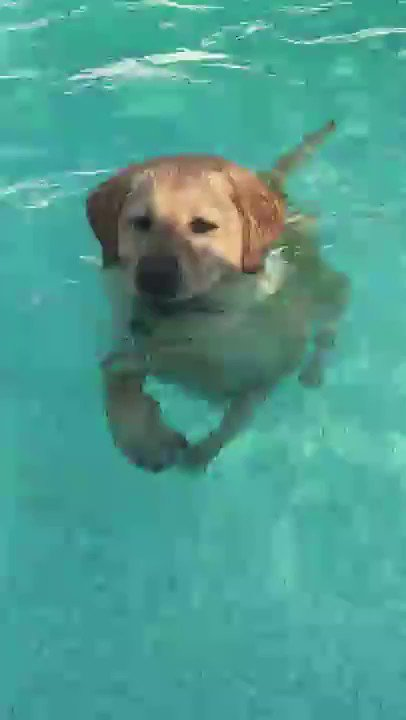

In [86]:
from IPython.display import Markdown as md
from IPython.display import Image

Image("most_like_dog.jpg")

#fr=2 #GHz


In [141]:
try:
    print('This is most liked dog {} with {} favorites. It\'s breed is {}.\nThe Original tweet: \"{}\"'.format(slice1['name'], slice1.favorite_count, slice1.breed, slice1.text))
    
except Exception as e:
    
    print( str(idd) + ": " + str(e))

This is most liked dog None with 154484 favorites. It's breed is Labrador_retriever.
The Original tweet: "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) "


In [103]:
print('Original tweet: {}'.format(slice1.text))

Original tweet: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) 


### 2) pick the mostly retweeted dog user id, to pull out the photo of it


In [88]:
slice2= df2.loc[df2['retweet_count'].idxmax()]
r = requests.get(slice2.jpg_url)
if r.status_code == 200:
    with open("most_retweet_dog.jpg", 'wb') as f:
        f.write(r.content)

In [89]:
slice2

tweet_id                                         744234799360020481
created_at                                      2016-06-18 18:26:18
favorite_count                                               154484
retweet_count                                                 76714
stage                                                       unknown
name                                                           None
ratings                                                       11/10
url                                         https://t.co/7wE9LTEXC4
text              Here's a doggo realizing you can stand in a po...
jpg_url           https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                           1
breed                                            Labrador_retriever
Name: 769, dtype: object

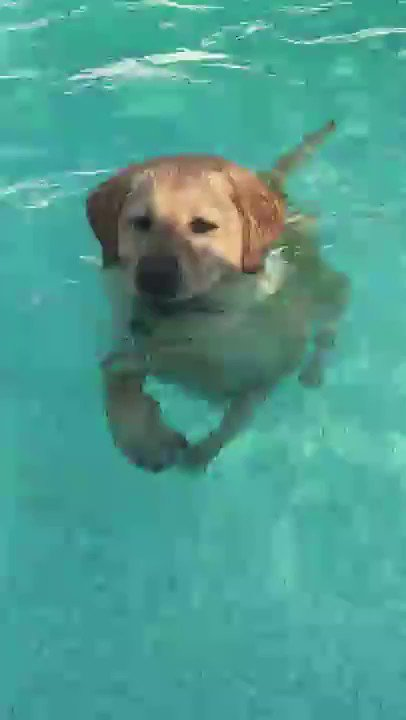

In [90]:
# download and show the image with dog's name, retweet_count and breed
from IPython.display import Markdown as md
from IPython.display import Image

Image("most_retweet_dog.jpg")



In [140]:
try:
    print('This is most liked dog {} with {} retweets. It\'s breed is {}. \nThe Original tweet: \"{}\"'.format(slice2['name'], slice2.retweet_count, slice2.breed, slice2.text))

except Exception as e:
    print( str(idd) + ": " + str(e))

This is most liked dog None with 76714 retweets. It's breed is Labrador_retriever. 
The Original tweet: "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) "


### 3) decide which breed the dog is via analyse the img_pred
comment: the image classification learning system should be improved.

In [128]:
# top 3 breeds

data = df2.breed.value_counts()
total = df2.shape[0]
per= ["{:.2f}%".format(value/total*100) for index,value in enumerate(data)]
ds = pd.Series(per, index=data.index)

In [129]:
% matplotlib inline

In [130]:
ds[0:4]

unknown               15.50%
golden_retriever       7.95%
Labrador_retriever     5.33%
Pembroke               4.78%
dtype: object

In [131]:


label = [ '' for _ in data]
label [0:4] = data.index[0:4] # only show the top 3 breed



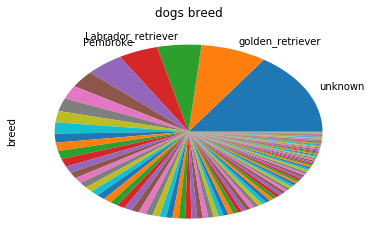

In [132]:
import matplotlib.pyplot as plt
data.plot.pie(labels = label, title = 'dogs breed');
plt.show(block = True)

### 4) total number of each stage of dog

In [96]:
df2.stage.value_counts()

unknown    1672
pupper      214
doggo        74
puppo        20
floofer       7
Name: stage, dtype: int64

In [97]:
data1 = df2.stage.value_counts()
per1= ["{:.2f}%".format(value/total*100) for index,value in enumerate(data1)]
ds1 = pd.Series(per1, index=data1.index)

In [98]:
ds1

unknown    84.15%
pupper     10.77%
doggo       3.72%
puppo       1.01%
floofer     0.35%
dtype: object

In [99]:
label = [ '' for _ in data1]
label [0:4] = data1.index[0:4] # only show the top 3 breed

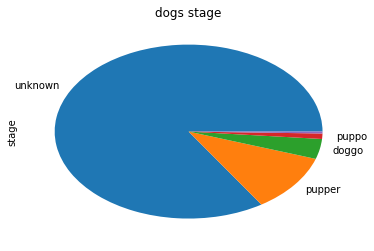

In [100]:
data1.plot.pie(labels = label, title = 'dogs stage');
plt.show(block = True)

## 5)Reporting for this Project

Please refer to the project report: wrangle_report.html and act_report.html